In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

## Zero Crossing

In [14]:
import numpy as np
import librosa
import pandas as pd
import os

# Initialize an empty list to store the results
results = []

# Loop over all the snare files
for i in range(94):
    # Construct the file name
    filename = f"../Sounds/Violin/Violin_{str(i).zfill(3)}.mp3"

    # Check if the file exists
    if not os.path.exists(filename):
        continue

    try:
        # Load the audio file
        y_orig, fs = librosa.load(filename, mono=True, sr=48000)

        output_time = 1 # seconds
        output_len = output_time * fs

        # number of samples of loaded file
        input_len = np.shape(y_orig)[0]

        # find a section with a high rms value
        jump = output_len//2 # spacing between sections
        rms_best = 0
        rms_best_start = 0

        # loop over sections of the sample to find the big with the best rms value
        for start in range(0, input_len - output_len, jump):
            end = start + output_len
            rms = np.sqrt(np.mean(np.square(y_orig[start:end])))
            if rms > rms_best:
                rms_best = rms
                rms_best_start = start

        y = y_orig[rms_best_start:rms_best_start + output_len]

        zero_crossings = librosa.zero_crossings(y, pad=False)
        mean = np.mean(zero_crossings)

        # Append the result to the list
        results.append([filename, mean])

    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Convert the results to a DataFrame and save as a CSV file
df = pd.DataFrame(results, columns=['filename', 'mean_zero_crossing_rate'])
df.to_csv('zero_crossing_rates.csv', index=False)


## Spectral Rolloff

In [56]:
import numpy as np
import librosa
import pandas as pd
import os

# Initialize an empty list to store the results
results = []

# Loop over all the snare files
for i in range(94):
    # Construct the file name
    filename = f"../Sounds/Violin/Violin_{str(i).zfill(3)}.mp3"

    # Check if the file exists
    if not os.path.exists(filename):
        continue

    try:
        # Load the audio file
        y_orig, fs = librosa.load(filename, mono=True, sr=48000)

        # Compute the spectral rolloff
        rolloff = librosa.feature.spectral_rolloff(y=y_orig, sr=48000, roll_percent=0.85)

        # Compute the mean spectral rolloff
        mean_rolloff = np.mean(rolloff)

        # Append the result to the list
        results.append([filename, mean_rolloff])

    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Convert the results to a DataFrame and save as a CSV file
df = pd.DataFrame(results, columns=['filename', 'mean_spectral_rolloff'])
df.to_csv('spectral_rolloffs.csv', index=False)


## Mel-Frequency Cepstral Coefficients (MFCCs)

C:\Users\pilla\AppData\Local\Temp\ipykernel_7556\2282731252.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))


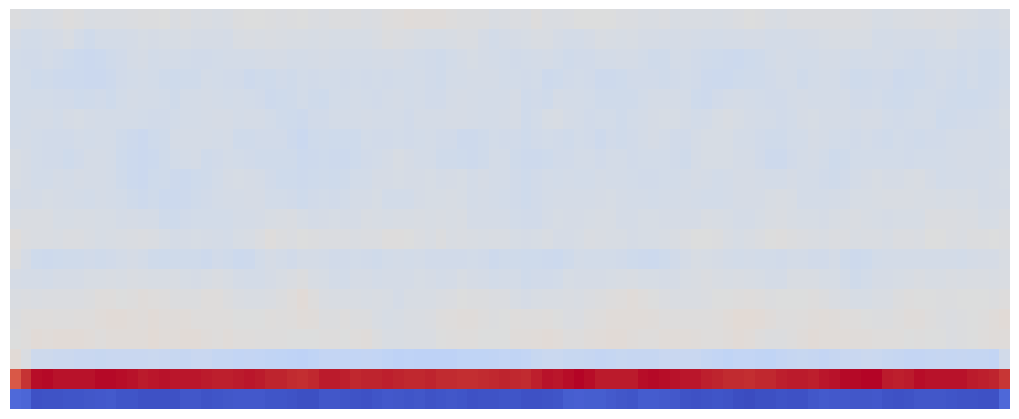

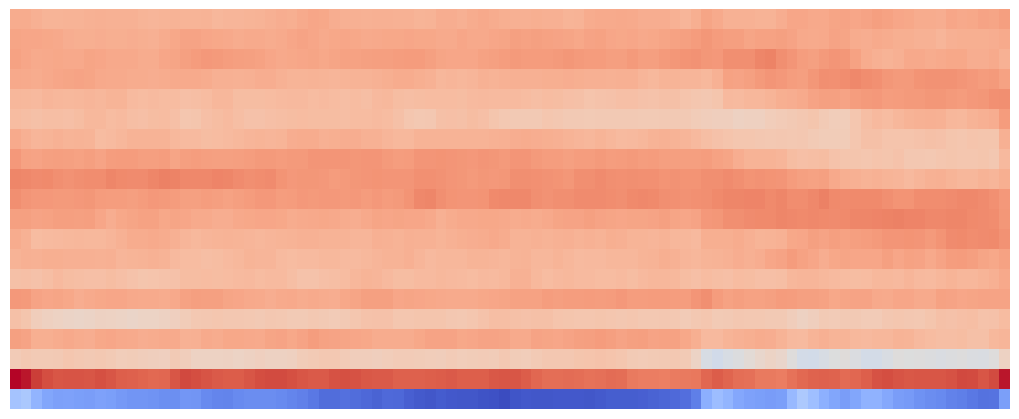

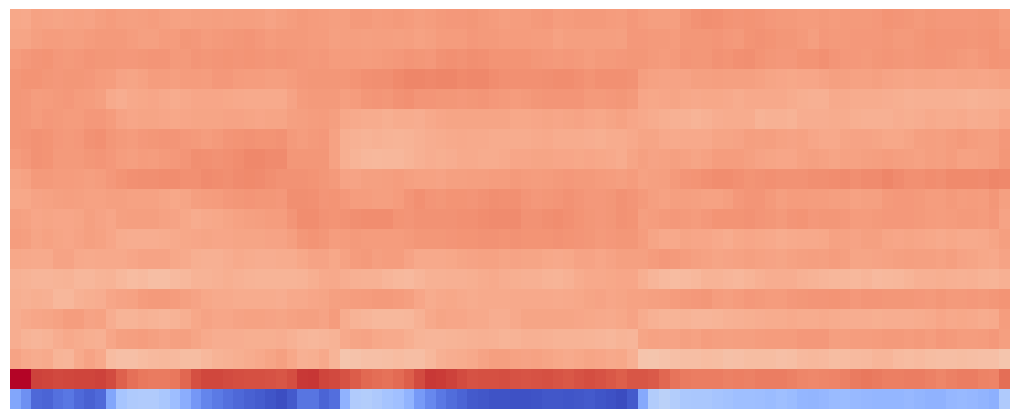

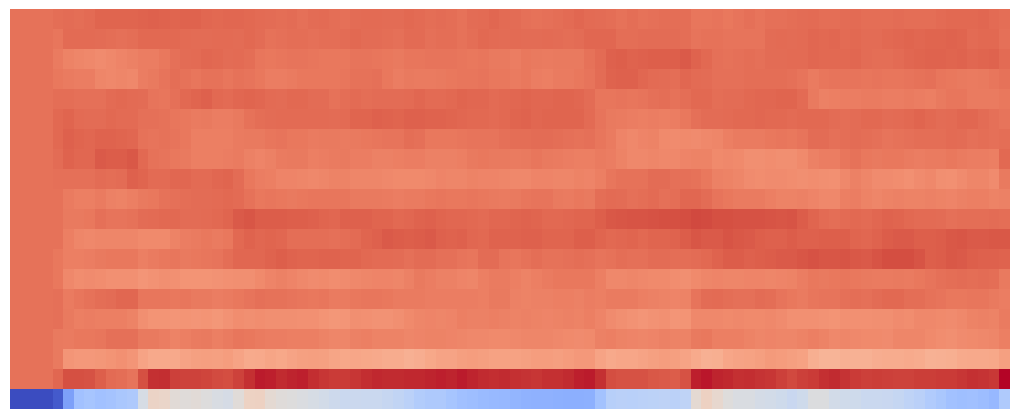

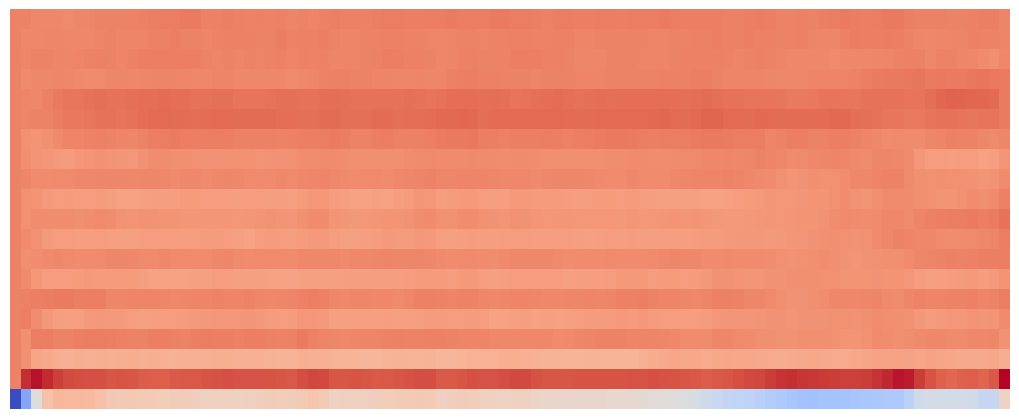

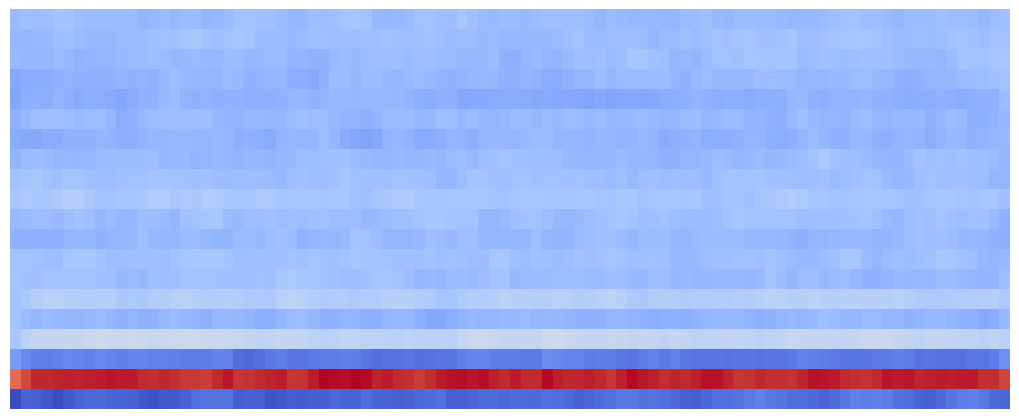

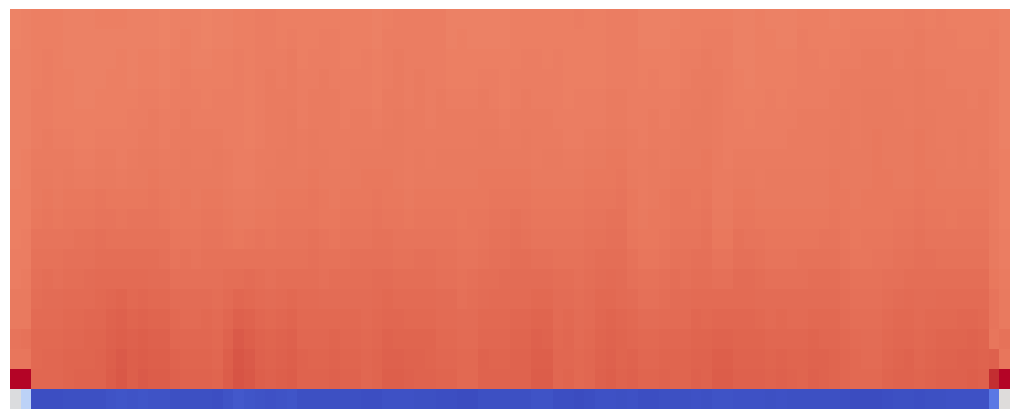

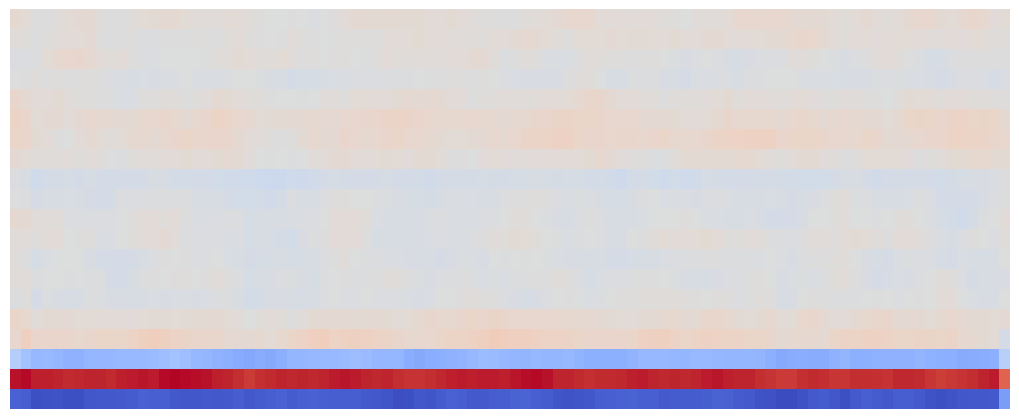

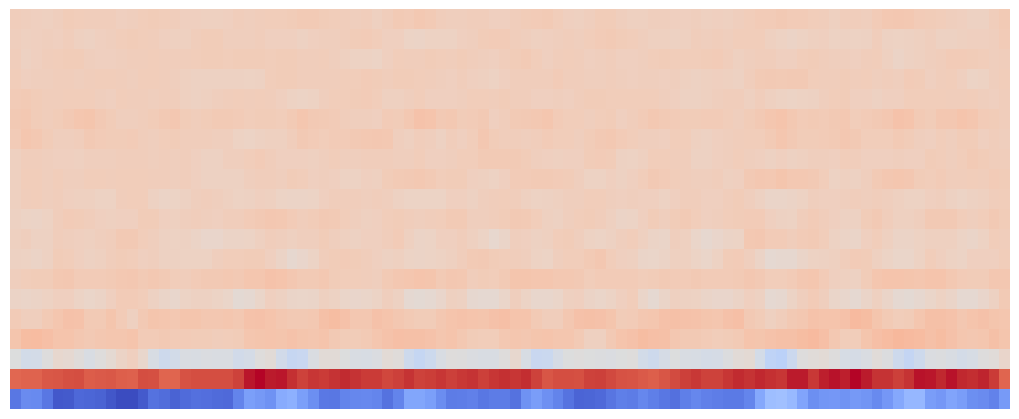

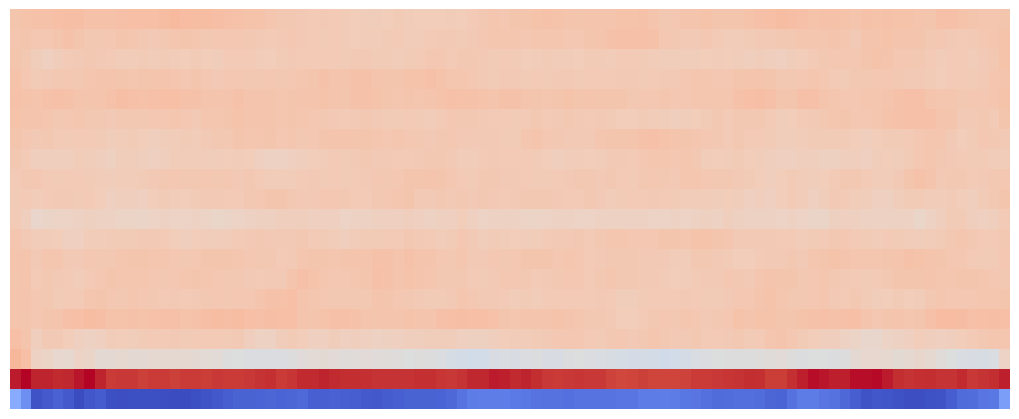

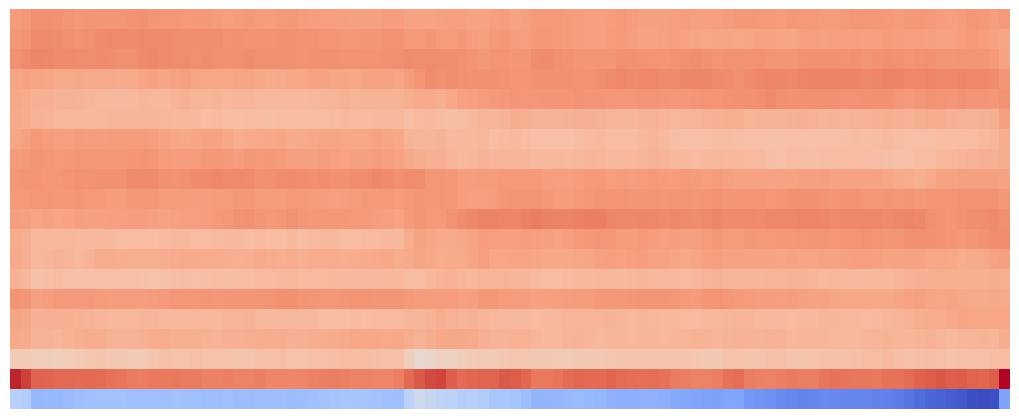

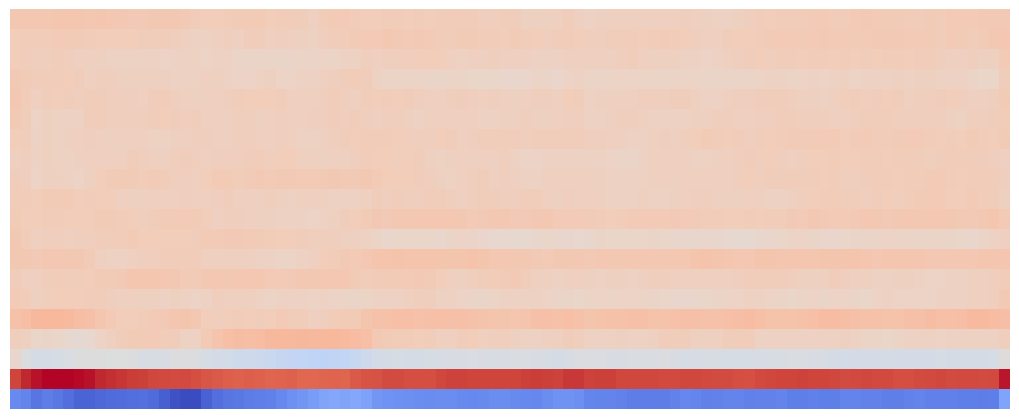

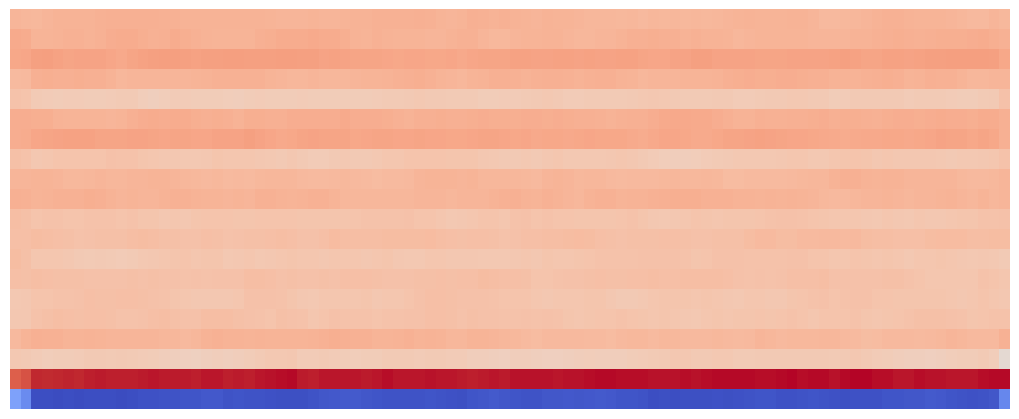

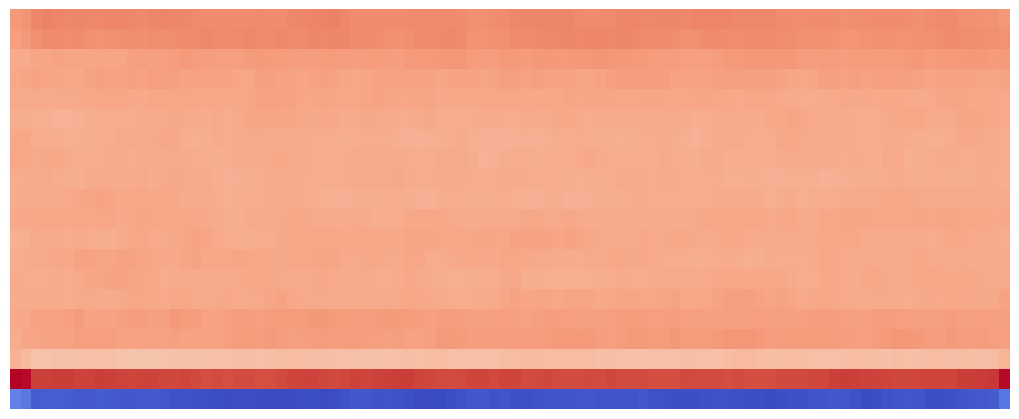

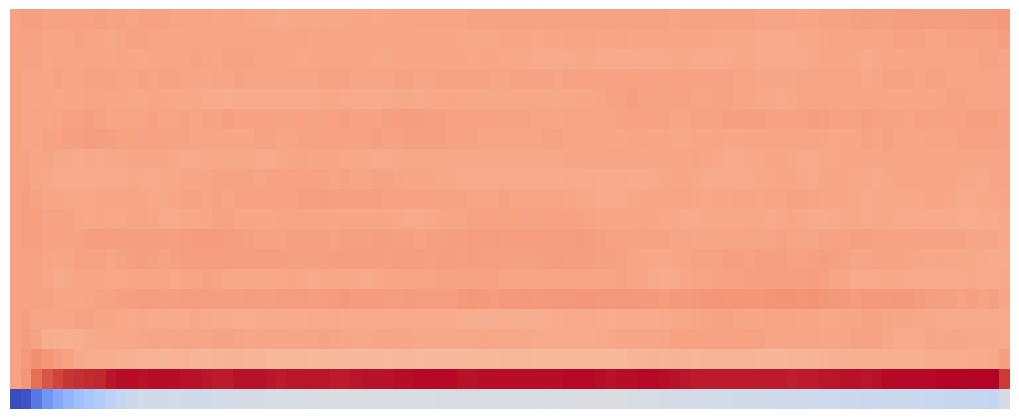

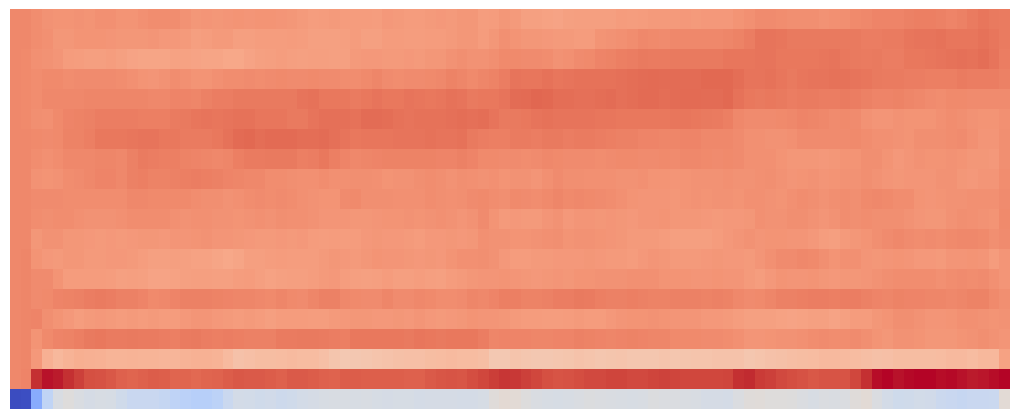

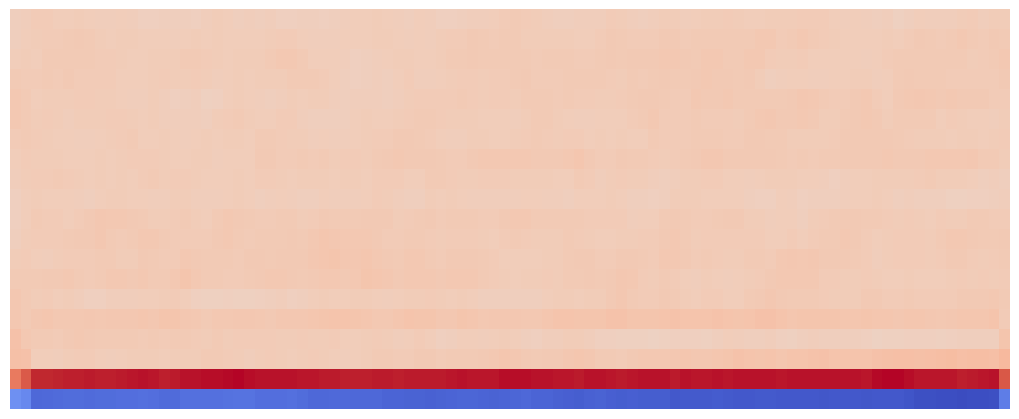

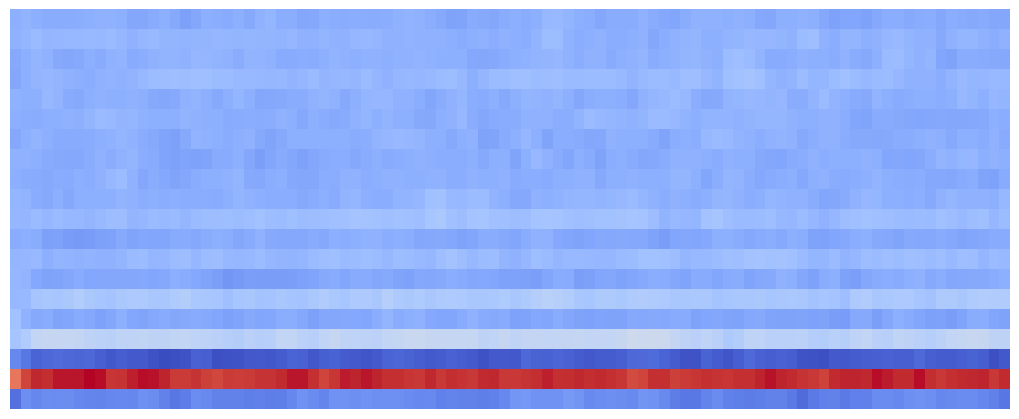

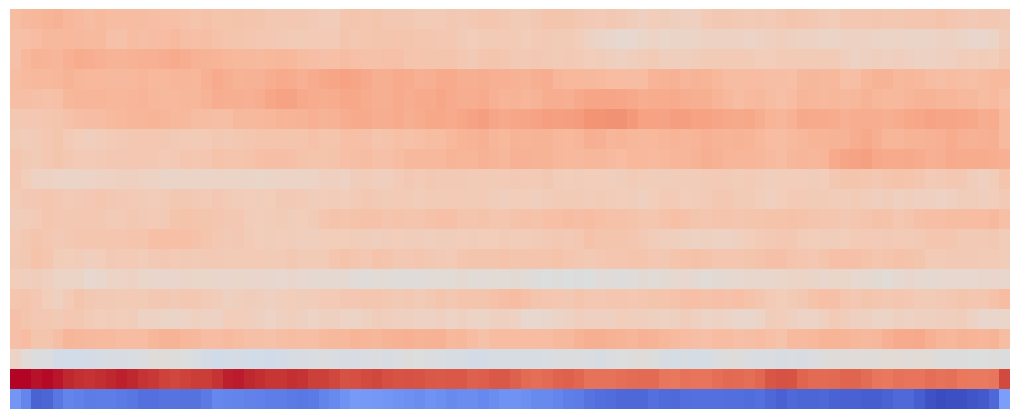

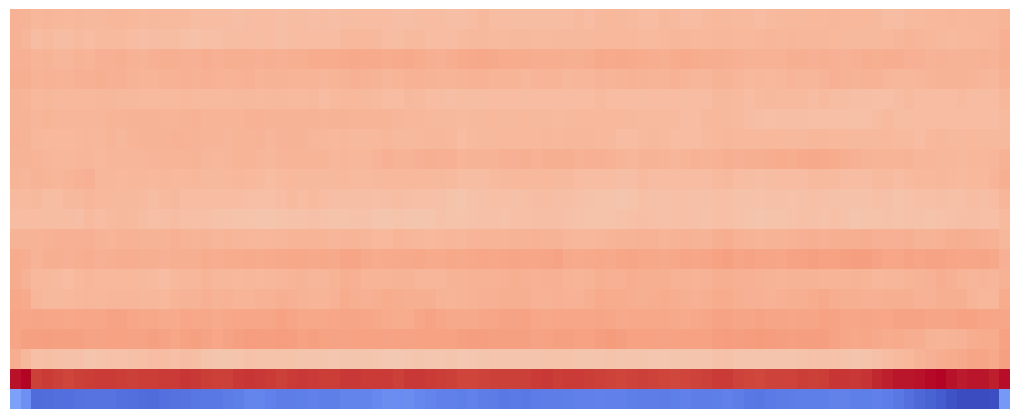

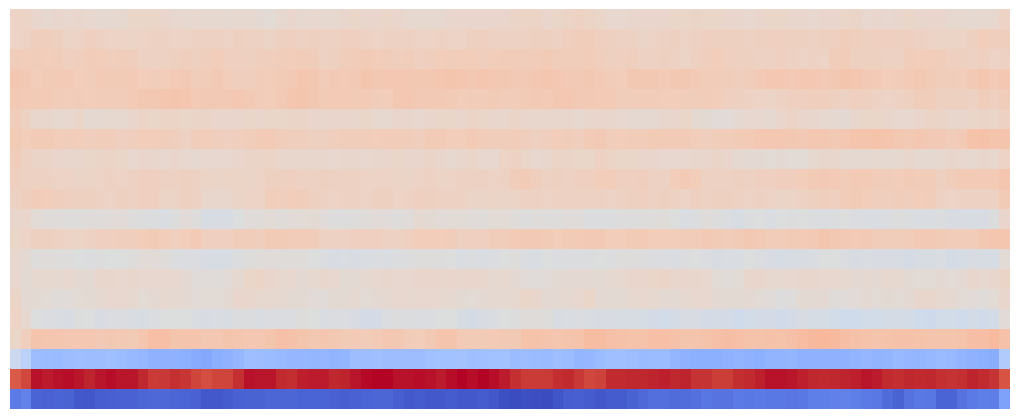

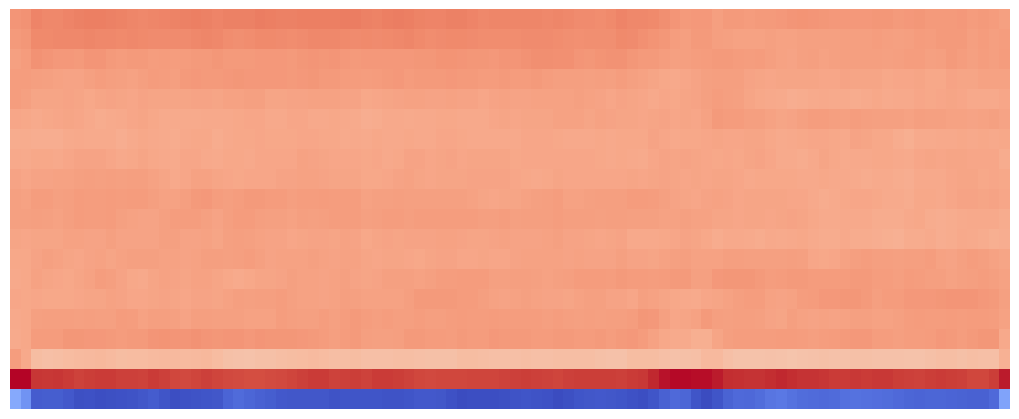

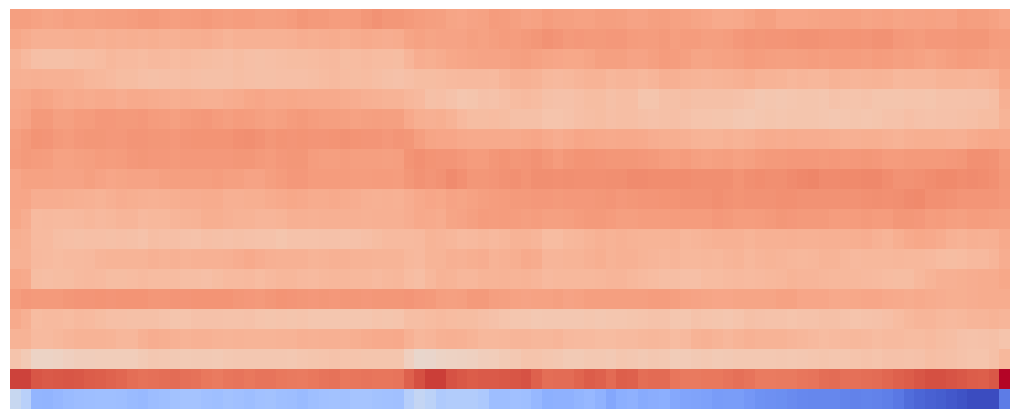

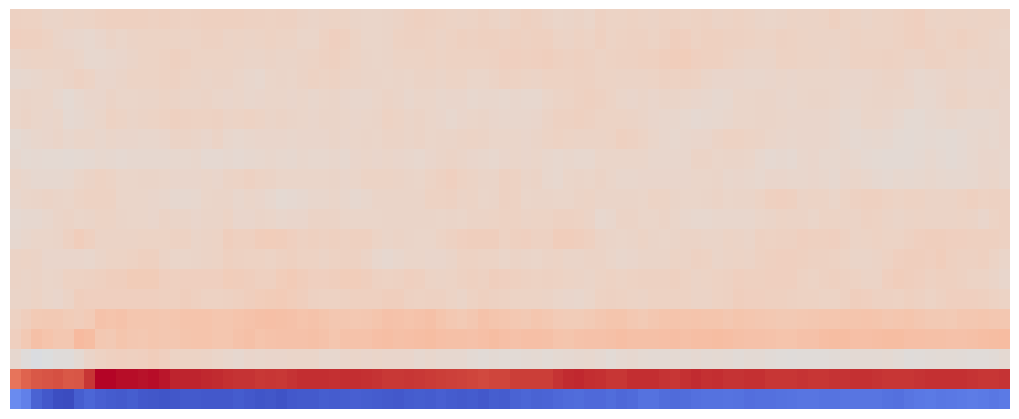

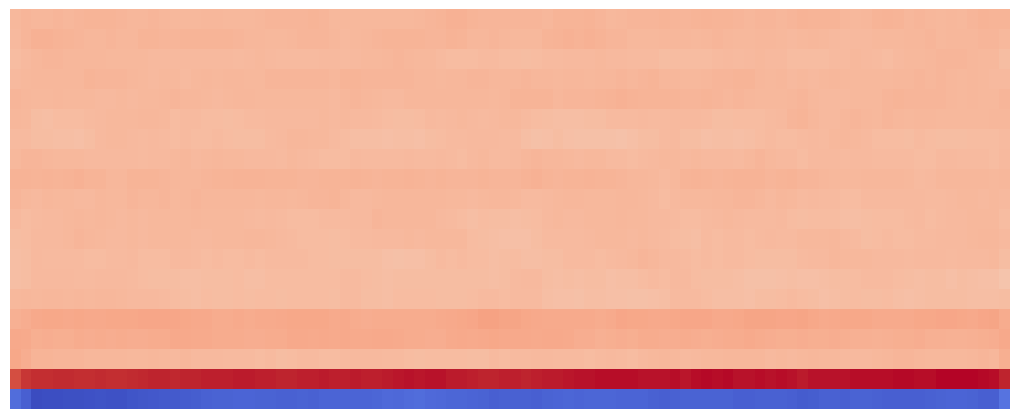

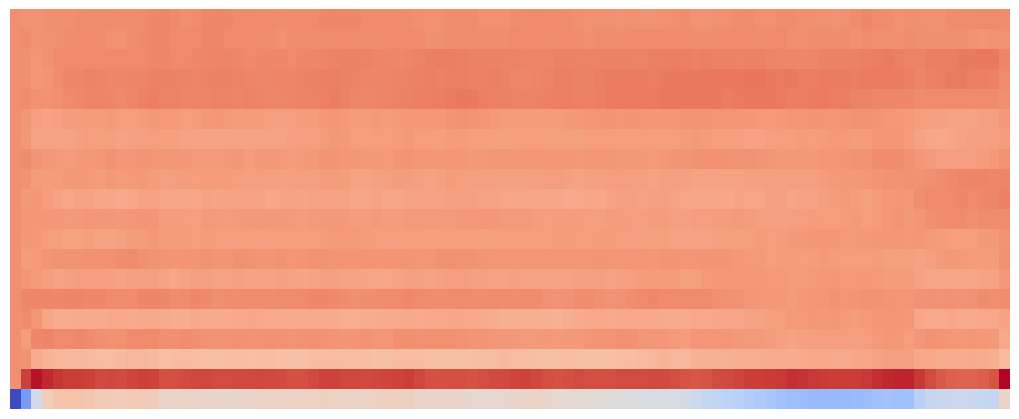

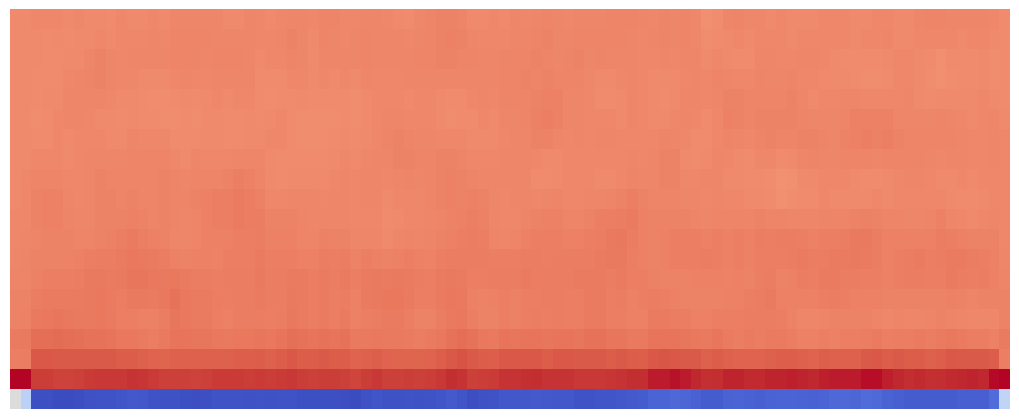

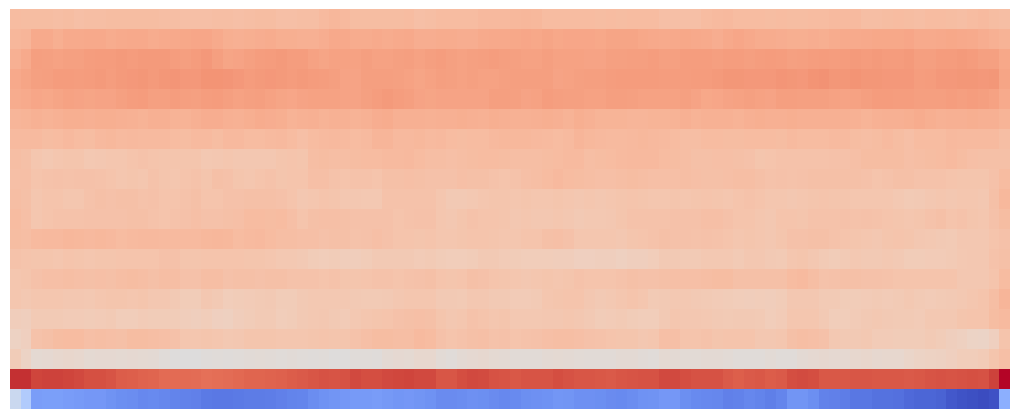

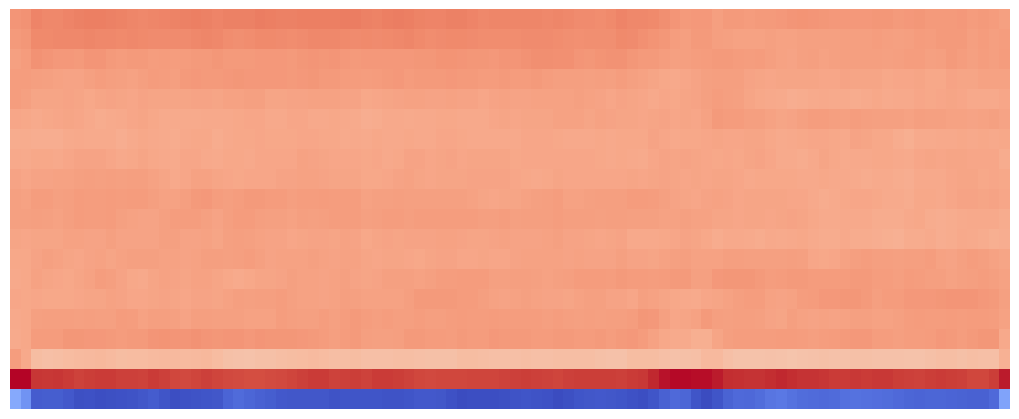

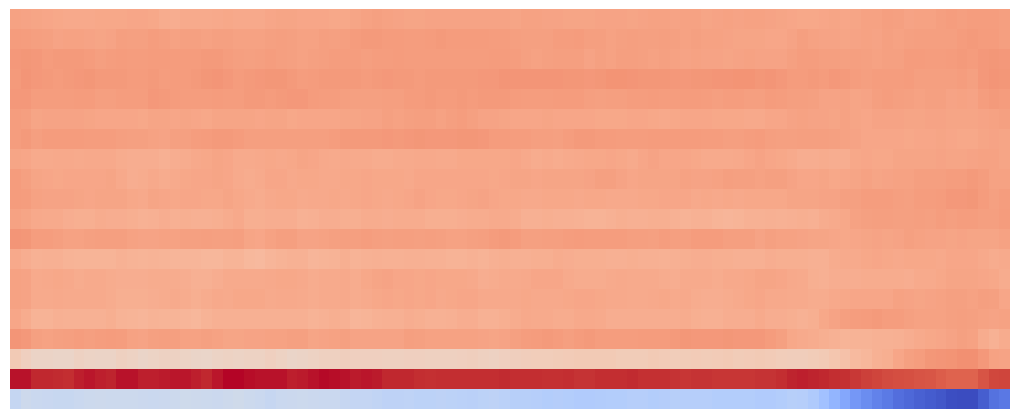

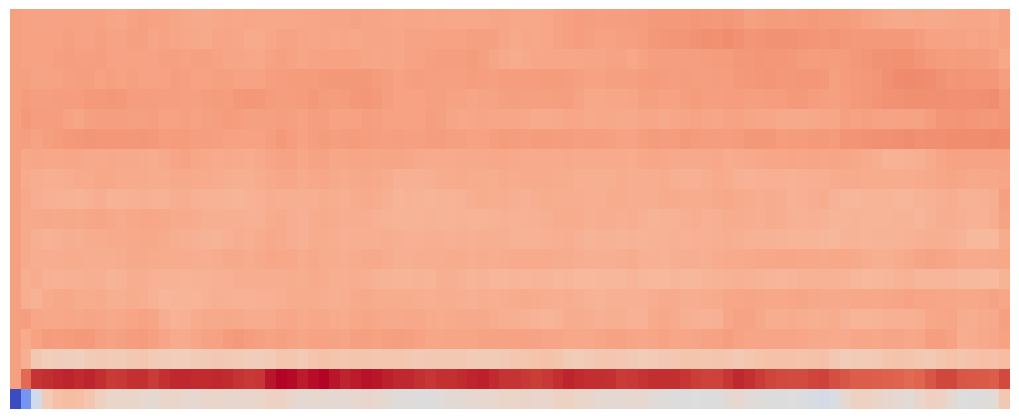

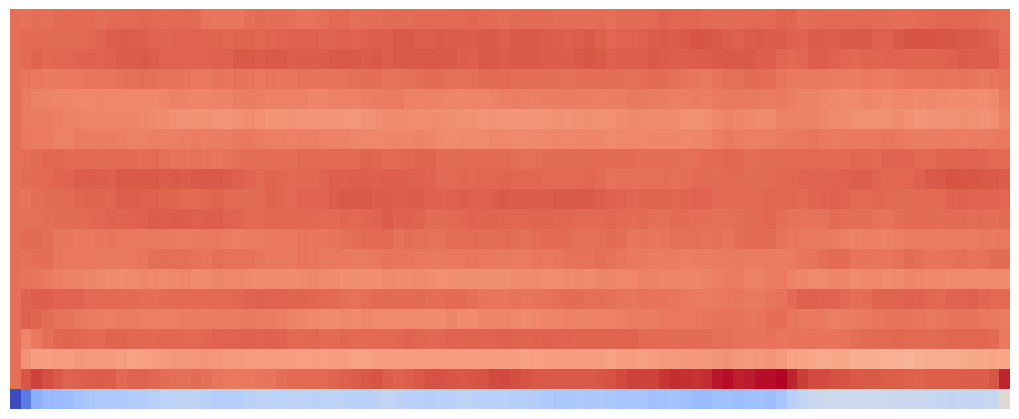

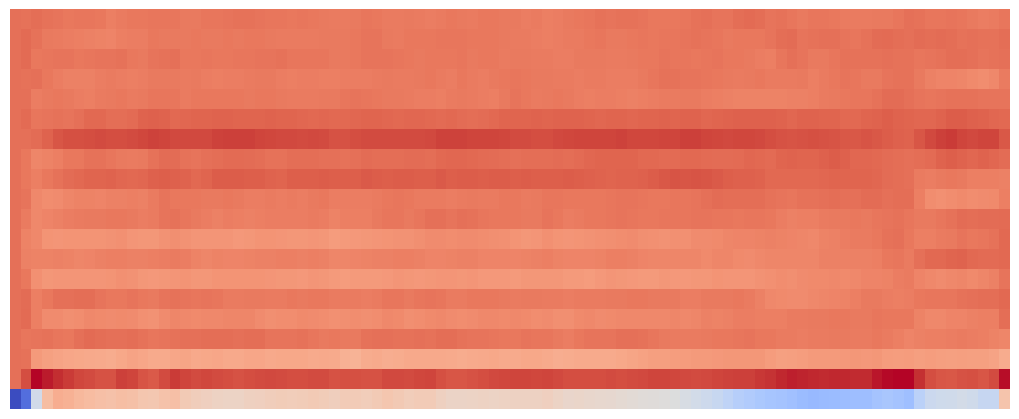

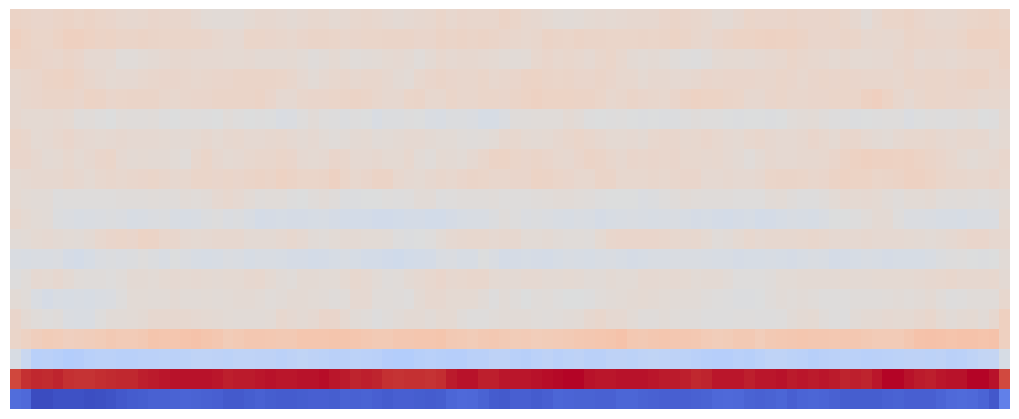

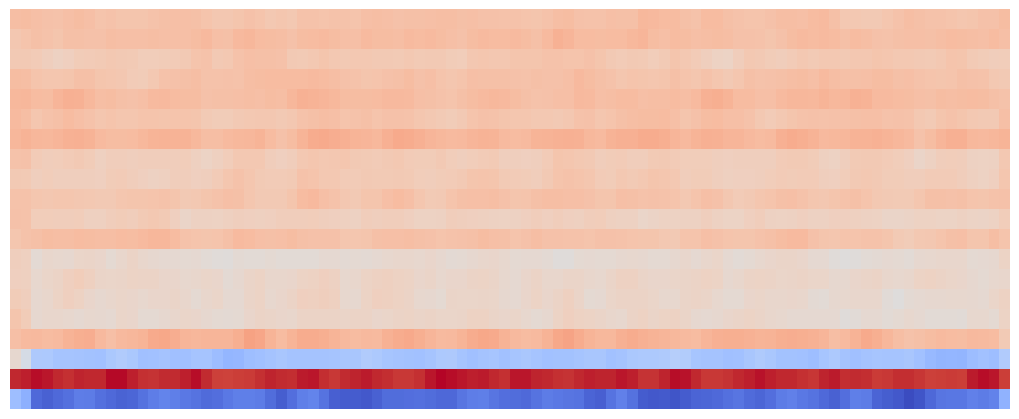

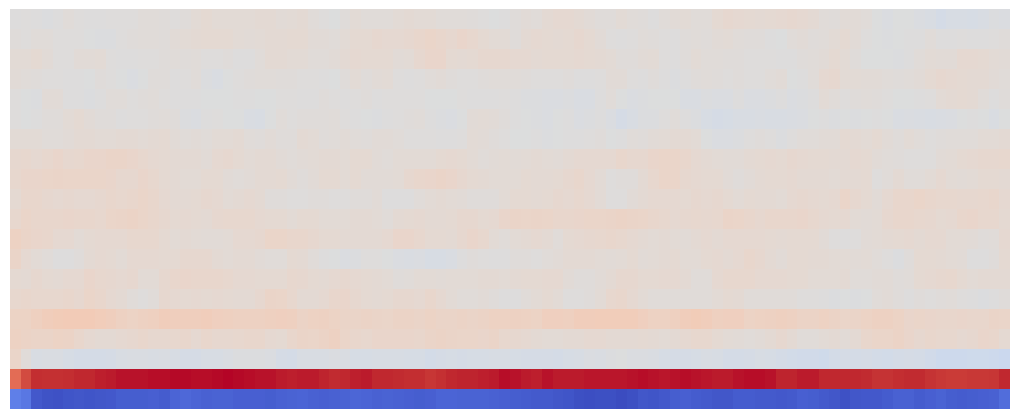

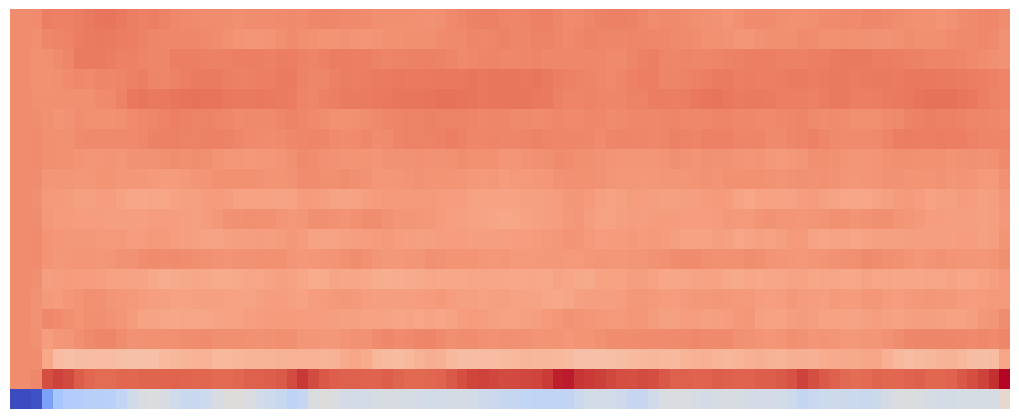

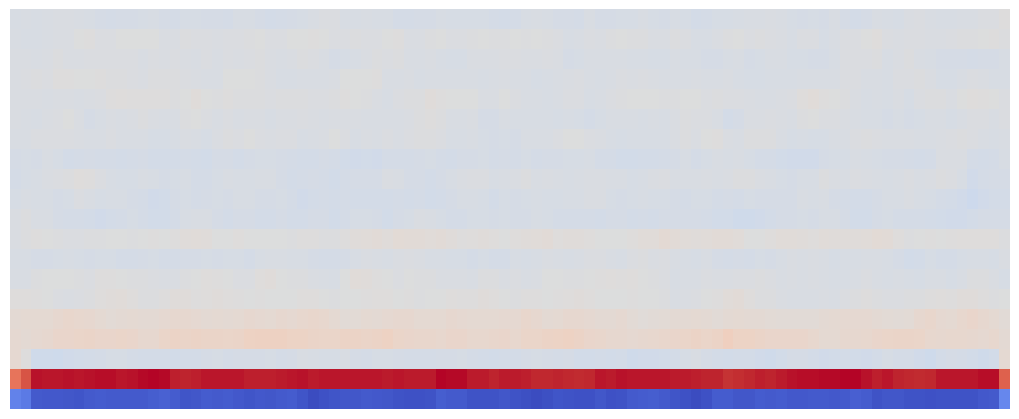

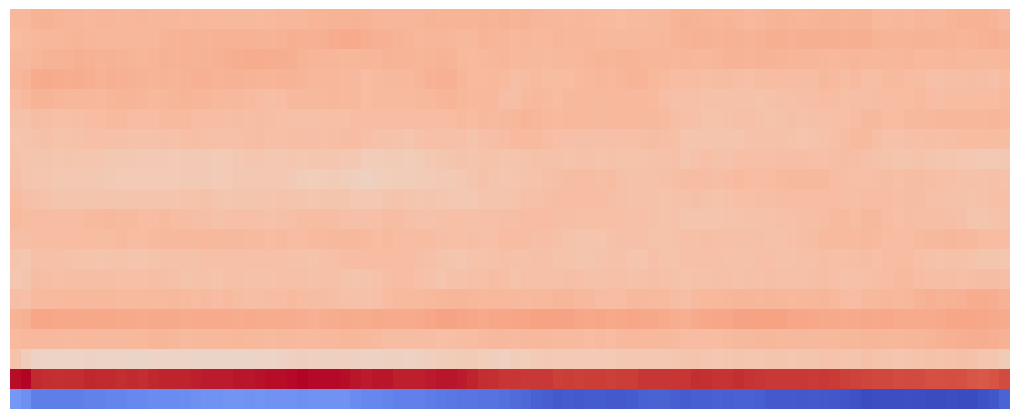

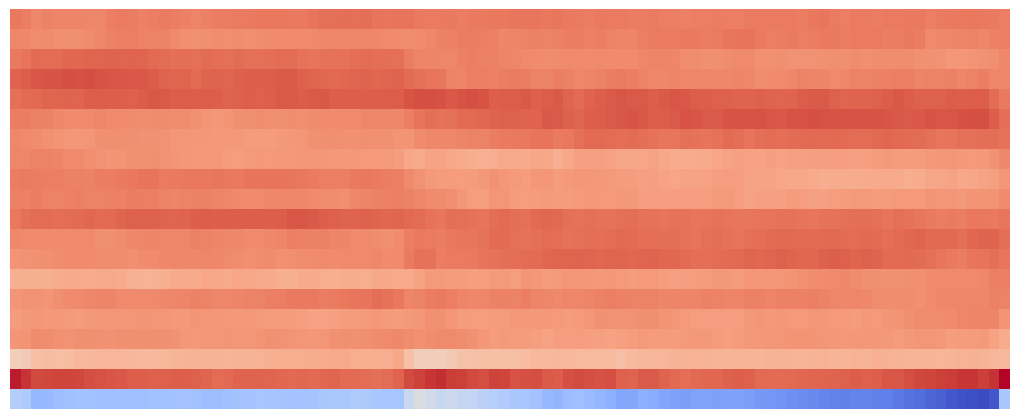

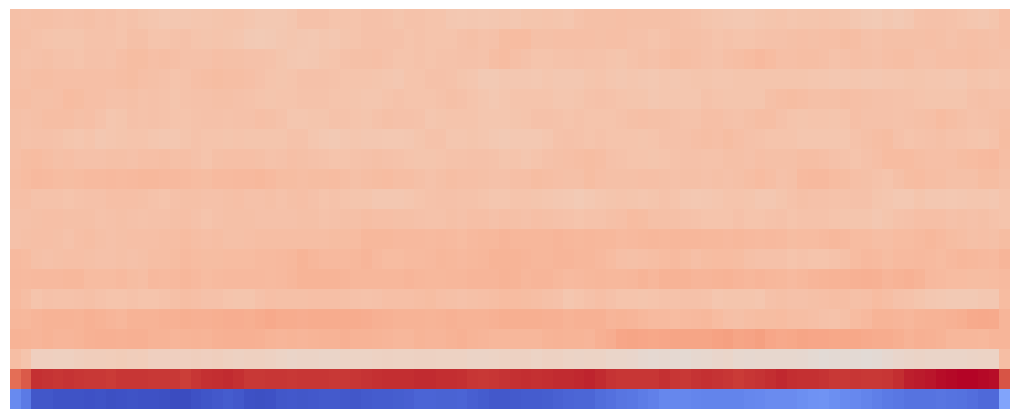

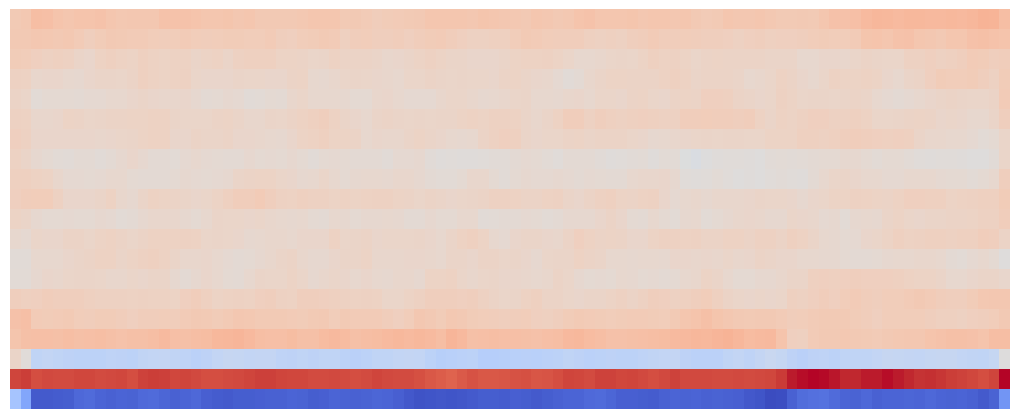

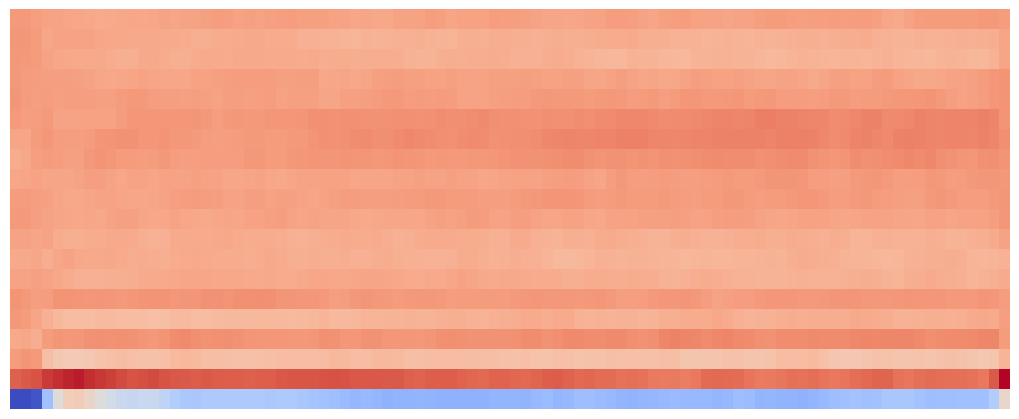

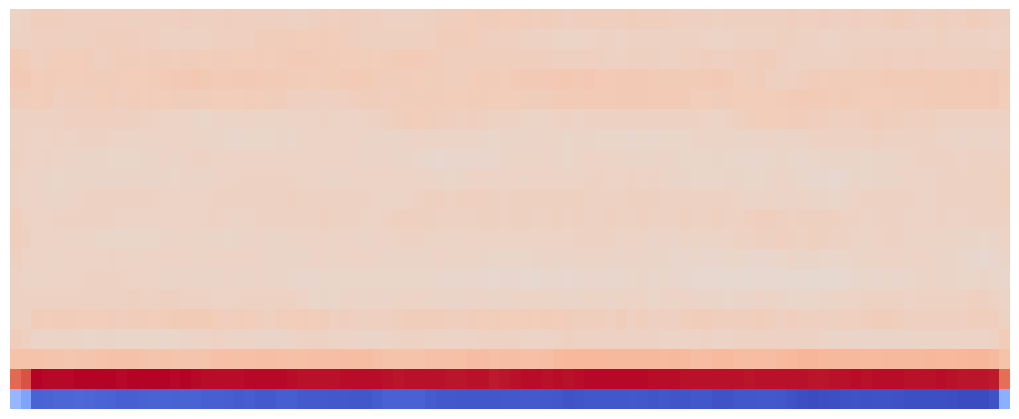

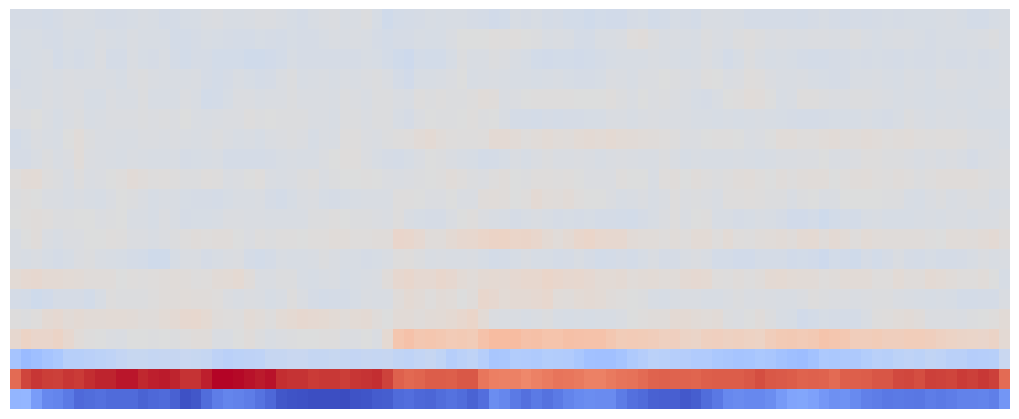

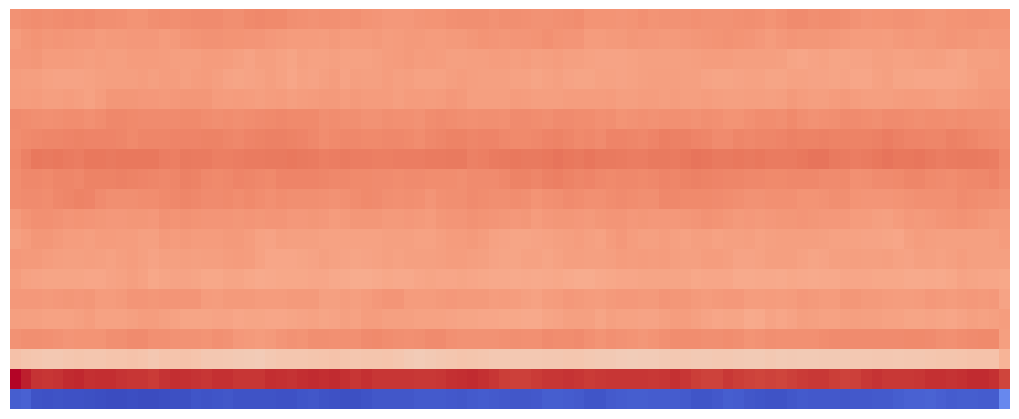

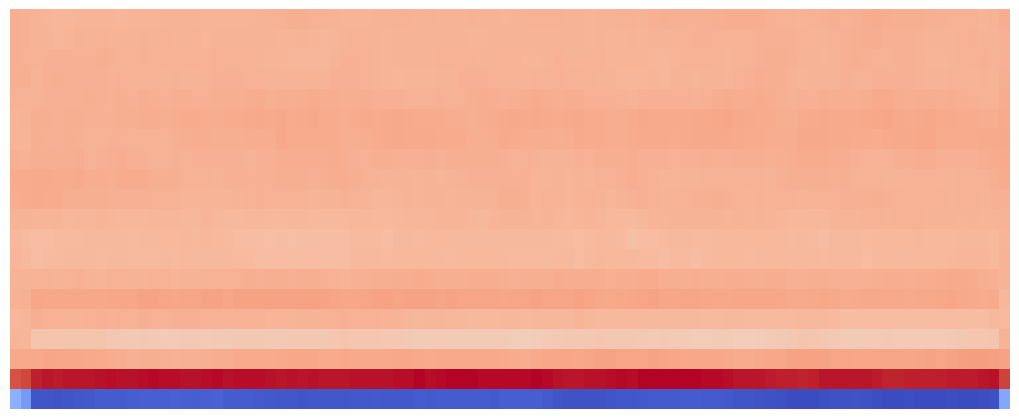

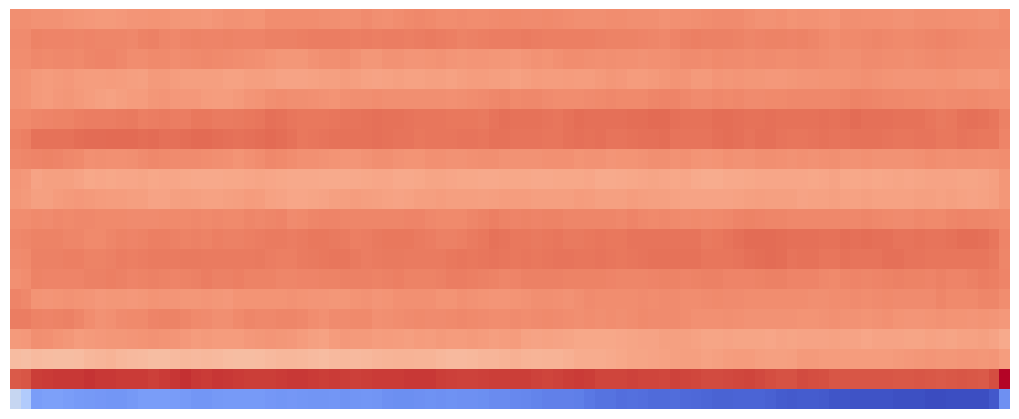

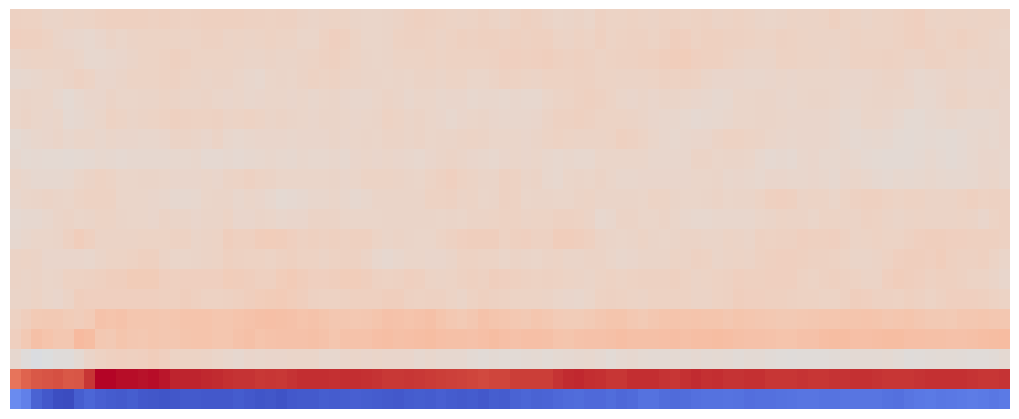

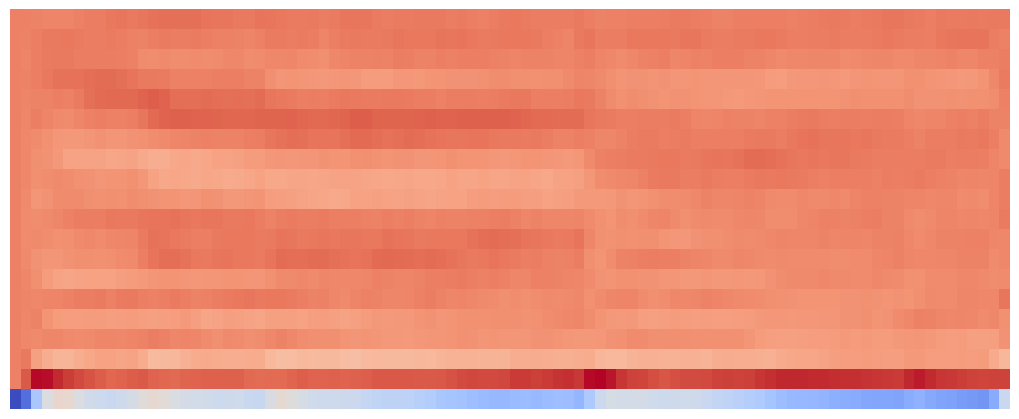

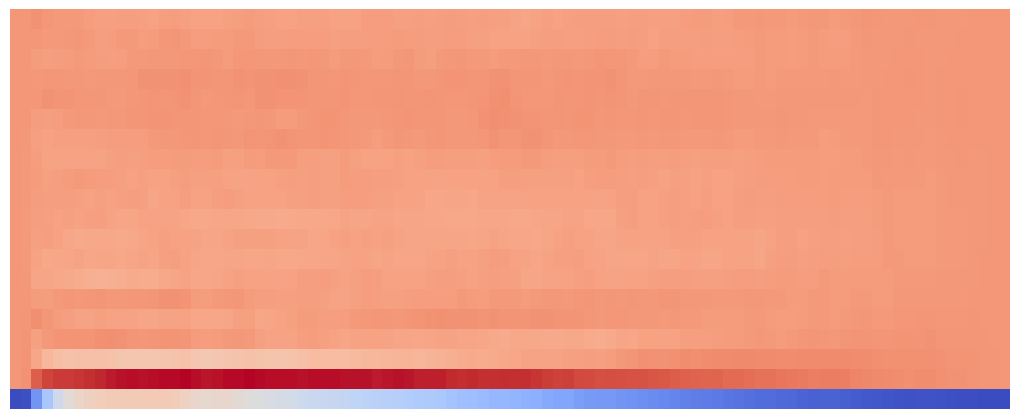

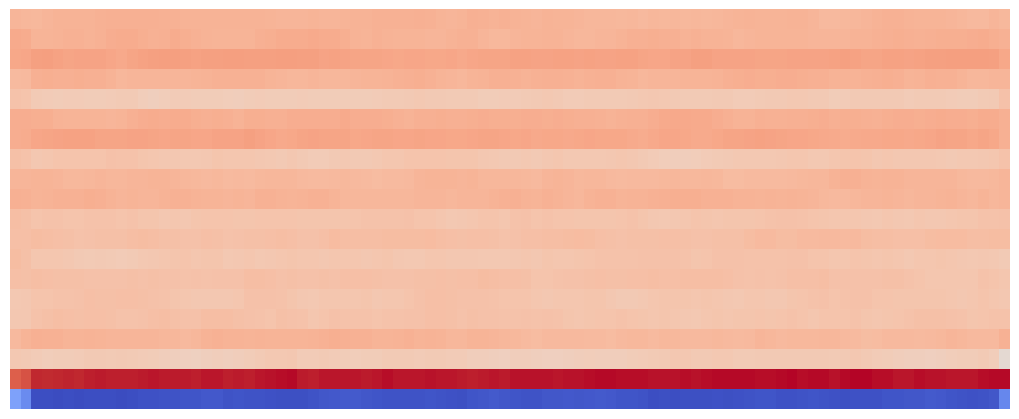

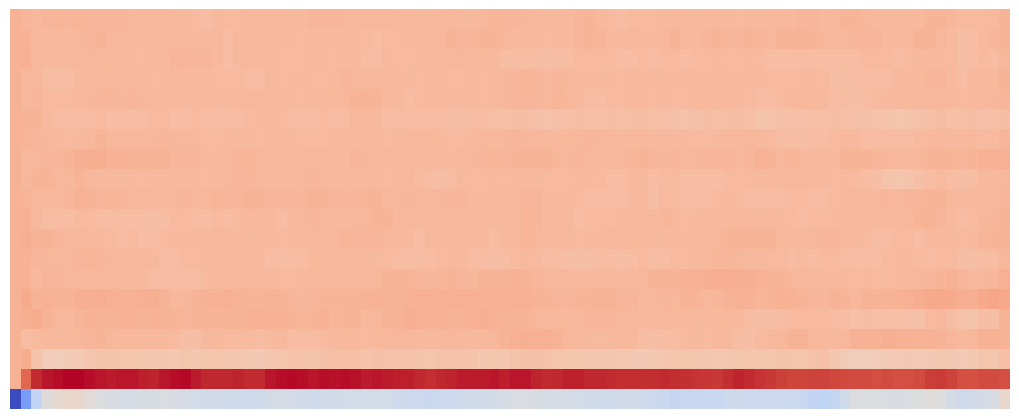

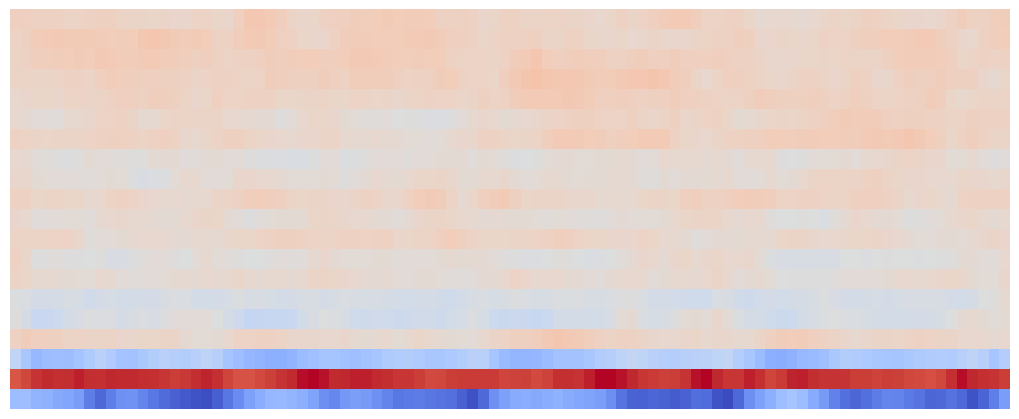

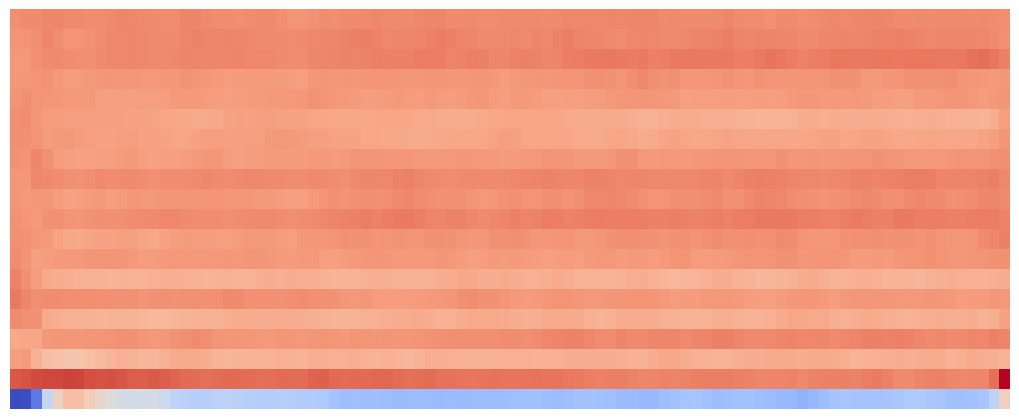

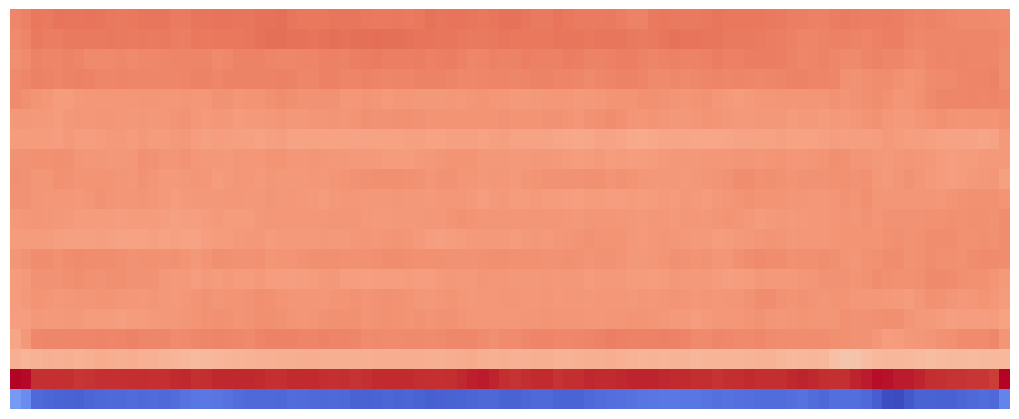

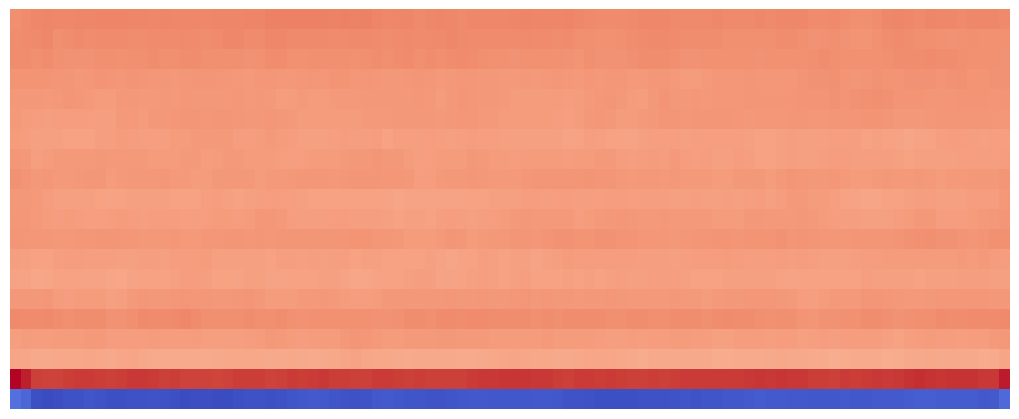

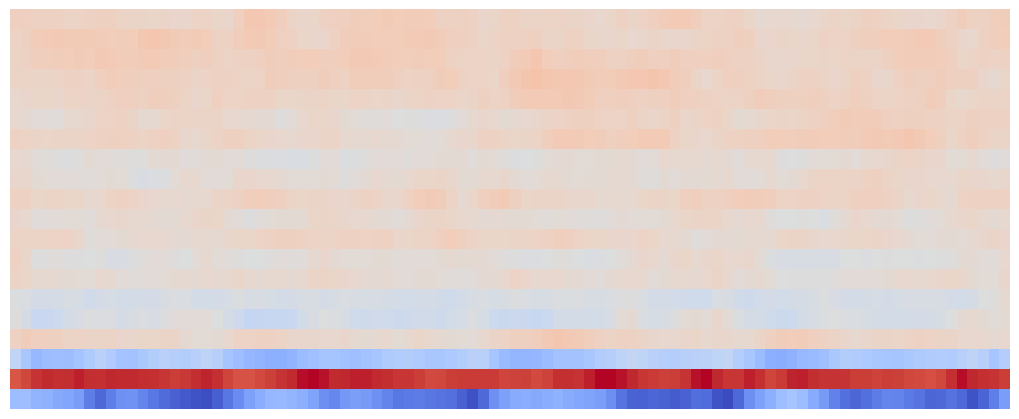

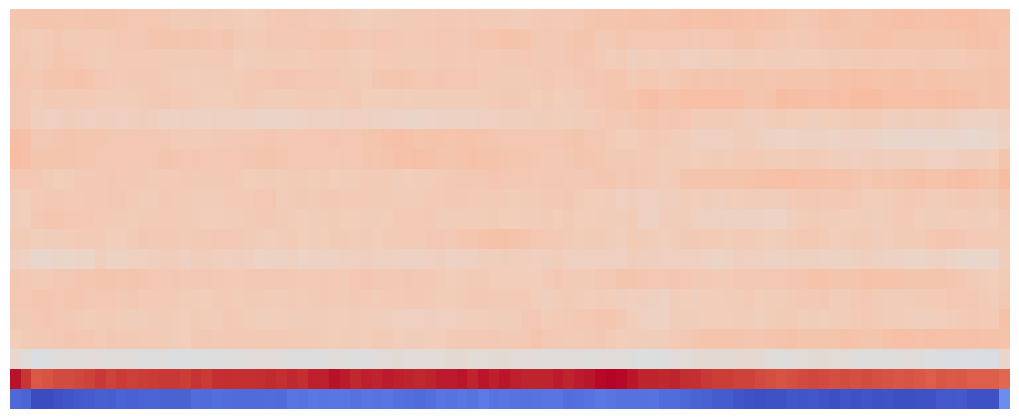

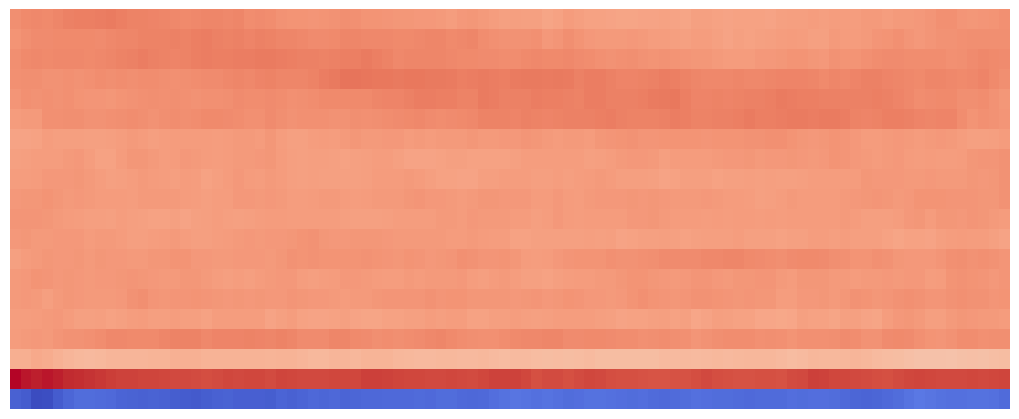

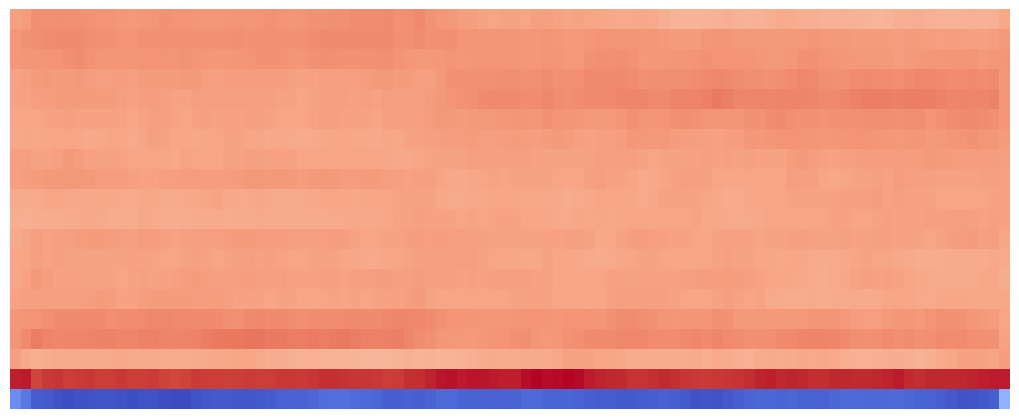

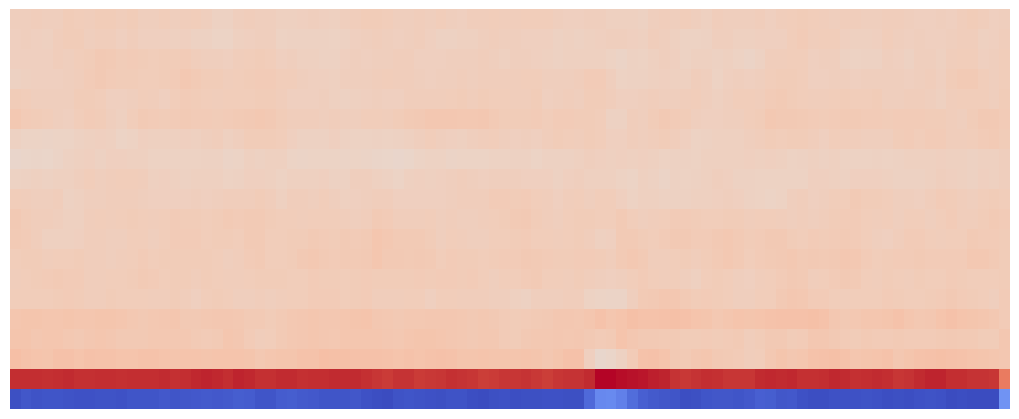

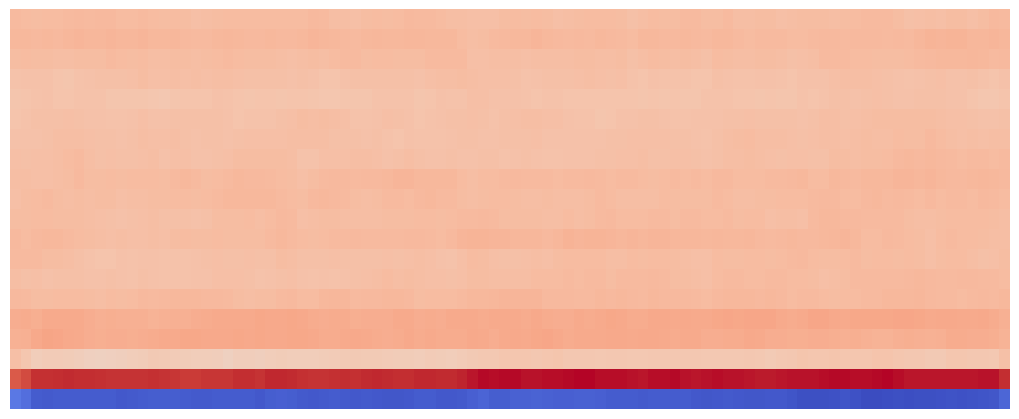

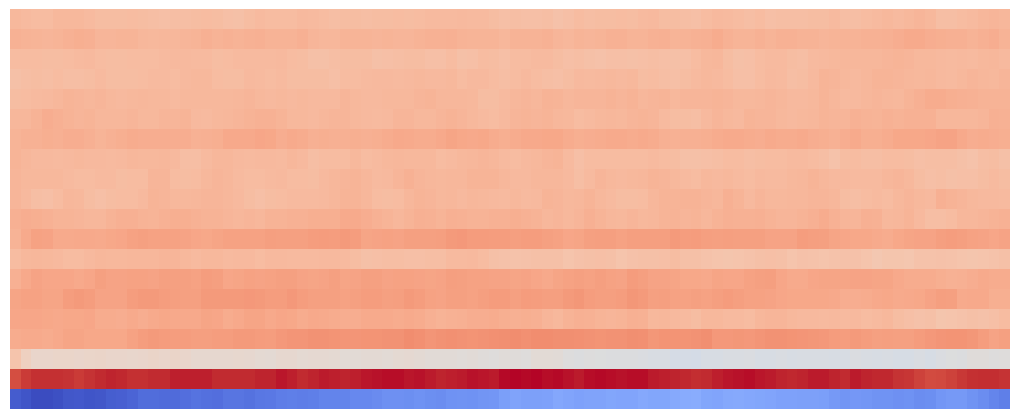

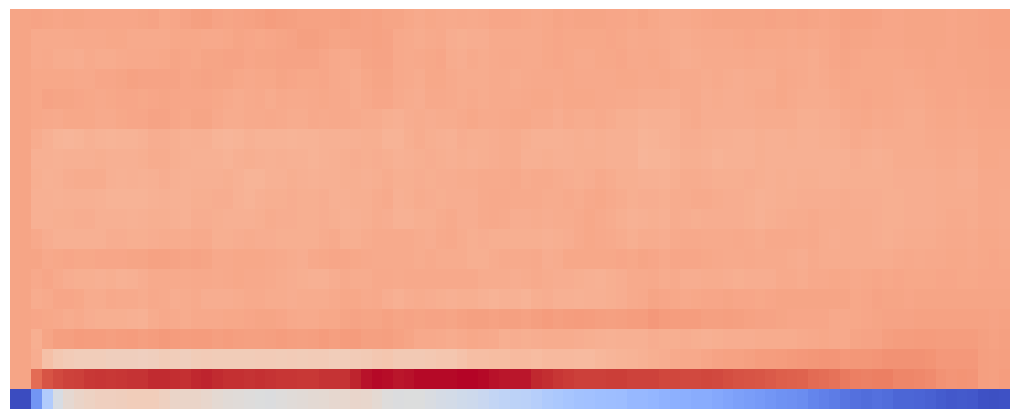

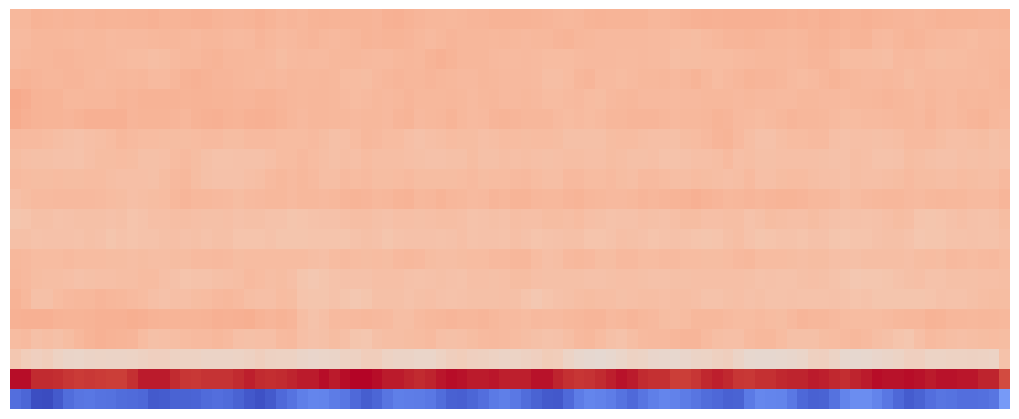

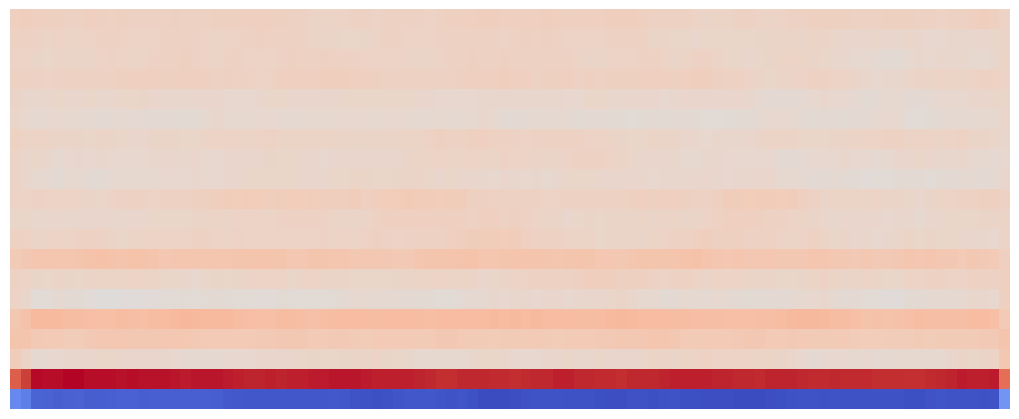

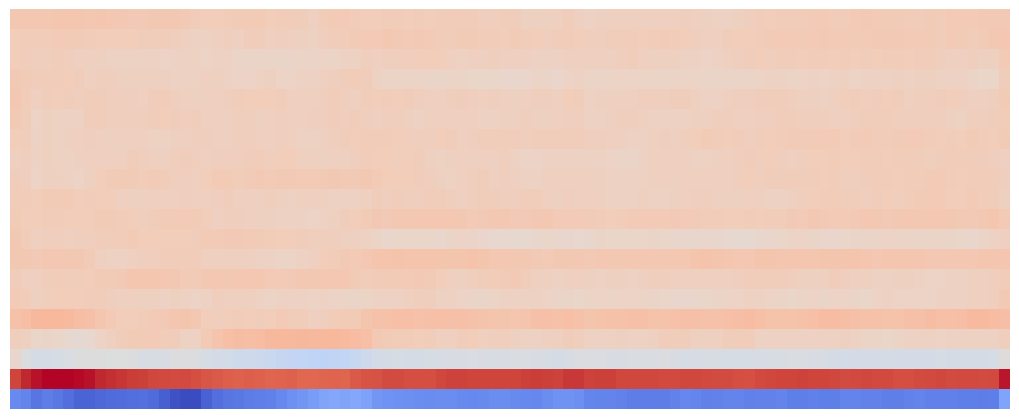

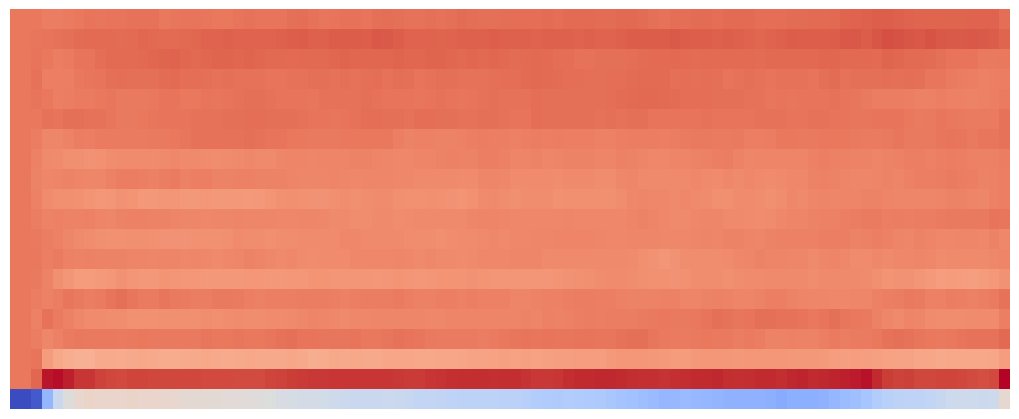

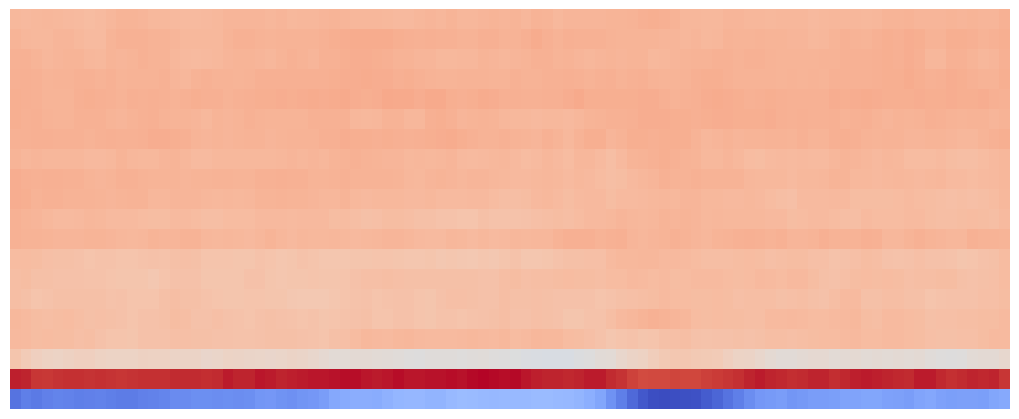

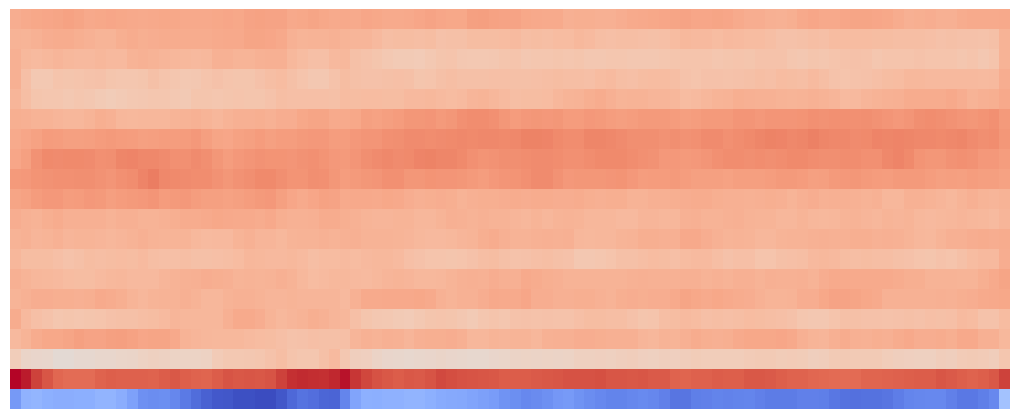

In [86]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Loop over all the snare files
for i in range(94):
    # Construct the file name
    filename = f"../Sounds/Violin/Violin_{str(i).zfill(3)}.mp3"

    # Check if the file exists
    if not os.path.exists(filename):
        continue

    try:
        # Load the audio file
        y_orig, fs = librosa.load(filename, mono=True, sr=48000)

        output_time = 1 # seconds
        output_len = output_time * fs

        # number of samples of loaded file
        input_len = np.shape(y_orig)[0]

        # find a section with a high rms value
        jump = output_len//2 # spacing between sections
        rms_best = 0
        rms_best_start = 0

        # loop over sections of the sample to find the big with the best rms value
        for start in range(0, input_len - output_len, jump):
            end = start + output_len
            rms = np.sqrt(np.mean(np.square(y_orig[start:end])))
            if rms > rms_best:
                rms_best = rms
                rms_best_start = start

        y = y_orig[rms_best_start:rms_best_start + output_len]

        # Compute the MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=48000)

        # Plot the MFCCs without title, axis labels, or colorbar
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs, sr=48000, x_axis=None, y_axis=None)
        plt.axis('off')  # no axis
        plt.tight_layout(pad=0)  # no padding

        # Save the plot as a PNG file
        plt.savefig(f"Violin_{str(i).zfill(3)}.png", bbox_inches='tight', pad_inches=0)

    except Exception as e:
        print(f"Error processing file {filename}: {e}")


## Spectral Centroid

In [108]:
import numpy as np
import librosa
import pandas as pd
import os

# Initialize an empty list to store the results
results = []

# Loop over all the snare files
for i in range(94):
    # Construct the file name
    filename = f"../Sounds/Violin/Violin_{str(i).zfill(3)}.mp3"

    # Check if the file exists
    if not os.path.exists(filename):
        continue

    try:
        # Load the audio file
        y_orig, fs = librosa.load(filename, mono=True, sr=48000)

        # Compute the spectral centroid
        centroid = librosa.feature.spectral_centroid(y=y_orig, sr=48000)

        # Compute the mean spectral centroid
        mean_centroid = np.mean(centroid)

        # Append the result to the list
        results.append([filename, mean_centroid])

    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Convert the results to a DataFrame and save as a CSV file
df = pd.DataFrame(results, columns=['filename', 'mean_spectral_centroid'])
df.to_csv('spectral_centroids.csv', index=False)


## Chroma Feature

In [112]:
snare_file = "../Sounds/Snare/Snare_007.wav"
# snare_file = "../Sounds/Trumpet/Trumpet_006.mp3"

y_orig, fs = librosa.load(snare_file, mono=True, sr=48000)

output_time = 1 # seconds
output_len = output_time * fs

# number of samples of loaded file
input_len = np.shape(y_orig)[0]

# find a section with a high rms value
jump = output_len//2 # spacing between sections
rms_best = 0
rms_best_start = 0

# loop over sections of the sample to find the big with the best rms value
for start in range(0, input_len - output_len, jump):
    end = start + output_len
    rms = np.sqrt(np.mean(np.square(y_orig[start:end])))
    if rms > rms_best:
        rms_best = rms
        rms_best_start = start
        
y = y_orig[rms_best_start:rms_best_start + output_len]

y_harmonic, y_percussive = librosa.effects.hpss(y_orig)
print(y_harmonic)
print(y_percussive)

[ 2.9940209e-03  3.1773450e-03  9.3155326e-03 ... -1.2209699e-10
  2.6585531e-10  1.7678882e-10]
[-1.3262873e-04  1.5768720e-02  4.8297260e-02 ...  1.2209690e-10
 -2.6585867e-10 -1.7678591e-10]
